In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import os
import watershed_udder as wu
from PIL import Image
from skimage import exposure
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

In [2]:
def mk_dir(dirpath):
    if not os.path.exists(dirpath):
        os.mkdir(dirpath)

rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}

plt.rcParams.update(rc)

In [3]:
dirpath = os.getcwd()
label_dir = r"validate_watershed\watershed_segments"
im_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir), r"udder_video\depth_images")
out_dir = r"validate_watershed\watershed_examples"
file_list = os.listdir(label_dir)

In [4]:
for file in ["1335_20231117_121441_frame_329.npy"]: # ["1295_20231117_130928_frame_334.npy", "1295_20231117_130928_frame_141.npy","1291_20231117_112153_frame_279.npy"]:#file_list[19005:19006]:
    label_file = os.path.join(label_dir, file)
    img_file = file.replace("npy", "tif")
    cow = file.split("_")[0]
    
    img = Image.open(os.path.join(im_dir, cow, img_file))
    labels = np.load(label_file)
    labels_mask =labels.copy().astype("float")
    img2 = exposure.equalize_hist(np.asarray(img), nbins=256, mask=None)
    labels_mask =labels.copy().astype("float")
    labels_mask[labels_mask==0] = np.nan
    
    # out_path = os.path.join(out_dir,cow)
    # mk_dir(out_path)
    # # fig.savefig(os.path.join(out_path, img_file), transparent = True)
    # # plt.close(fig)

    cmap = ListedColormap(["yellow","deepskyblue" , "cyan", "darkblue"])
    fig, ax = plt.subplots( frameon = False)
    ax.imshow(img2, cmap='gray')
    ax.imshow(labels_mask, cmap = cmap, alpha=0.5)
    fig.show()
    
    out_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir), r"adsa\examples")
    out_path = os.path.join(out_dir, file+".png")
    fig.savefig(out_path, transparent = True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\marie\\rep_codes\\udder_project\\udder_video\\depth_images\\1335\\1335_20231117_121441_frame_329.tif'

C:\Users\marie\AppData\Local\Temp\ipykernel_10708\2472563830.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


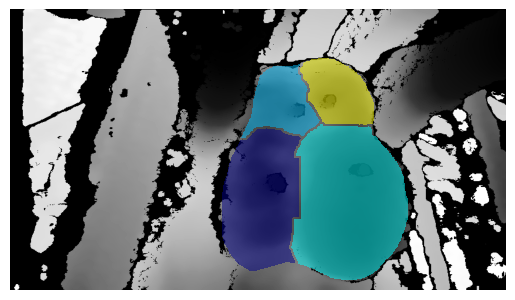

In [95]:
# from matplotlib.colors import LinearSegmentedColormap, ListedColormap
# cmap = ListedColormap(["yellow","deepskyblue" , "cyan", "darkblue"])
# fig, ax = plt.subplots( frameon = False)
# ax.imshow(img2, cmap='gray')
# ax.imshow(labels_mask, cmap = cmap, alpha=0.5)
# fig.show()

# out_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir), r"adsa\examples")
# out_path = os.path.join(out_dir, "good_669_ws.png")
# fig.savefig(out_path, transparent = True)